In [3]:
%load_ext autoreload
%autoreload 2

from setup_func import *

import importlib
import decision_models.a2_wsls
import decision_models.c_nobias_asymmetric_rw
import decision_models.d_lrbias_rw
import decision_models.e_betabias_rw
import decision_models.n_momentum_rw
import decision_models.o_add_rewbias_rw
from decision_models.utils import store_modout, model_comparison

from pyEM.fitting import EMfit
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
path_to_summary = f'{data_dir}/clean_all_group_df_summary.csv'
path_to_longform = f'{data_dir}/clean_all_group_longform.csv'

summary_df = pd.read_csv(path_to_summary, index_col=0)
longform = pd.read_csv(path_to_longform, index_col=0)

alcohol_longform = longform[longform['Group'] == 'alcohol']
cannabis_longform = longform[longform['Group'] == 'cannabis']

In [5]:
model_func_dict = {
    'a2_wsls': decision_models.a2_wsls.simulate,
    'c_nobias_asymmetric_rw': decision_models.c_nobias_asymmetric_rw.simulate,
    'd_lrbias_rw': decision_models.d_lrbias_rw.simulate,
    'e_betabias_rw': decision_models.e_betabias_rw.simulate,
    'n_momentum_rw': decision_models.n_momentum_rw.simulate,
    'o_add_rewbias_rw': decision_models.o_add_rewbias_rw.simulate
}

## EMFit for all alcohol data

In [6]:
modout = {}

save_fit_path=f'{results_dir}/decision/'
if not os.path.exists(save_fit_path):
    os.makedirs(save_fit_path)
if os.path.exists(f'{save_fit_path}/alcohol_decision_models.pkl'):
    print('Loading existing decision models')
    with open(f'{save_fit_path}/alcohol_decision_models.pkl', 'rb') as f:
        modout = pickle.load(f)


Loading existing decision models


### Optimal addictive cue condition - Alcohol

In [7]:
model = 'd_lrbias_rw'
block = 'other'
mod = 0

sim_func = model_func_dict[model]
print(f'Simulating Model: {model}, Block: {block}')
model_name = f'{model}_{block}'
num_sims = 100
num_trials = 60
num_subjects = 12
sim_choices = np.zeros((num_sims, num_subjects, num_trials))
sim_rewards = np.zeros((num_sims, num_subjects, num_trials))

beta_vals = np.linspace(-4, 2, 121)
alpha_vals = np.linspace(-3, 3, 121)
rew_mesh = np.zeros((len(beta_vals), len(alpha_vals)))

for i, beta in enumerate(beta_vals):
    for j, alpha in enumerate(alpha_vals):
        # print(f'Alpha: {alpha}, Beta: {beta}')
        output = sim_func(
            np.array([[beta, alpha, mod],[beta, alpha, mod]]),
            block,
            modout[model_name]['behavior']['craving_ratings'][:2],
            ntrials=num_trials
        )
        # print(f'Alpha: {alpha}, Beta: {beta}, Reward: {output["rewards"].mean()}')
        rew_mesh[i, j] = output['rewards'].mean()
print(rew_mesh)

Simulating Model: d_lrbias_rw, Block: other
[[0.48333333 0.50833333 0.45833333 ... 0.5        0.50833333 0.43333333]
 [0.575      0.50833333 0.475      ... 0.575      0.46666667 0.54166667]
 [0.45833333 0.56666667 0.55       ... 0.48333333 0.475      0.51666667]
 ...
 [0.475      0.50833333 0.45833333 ... 0.64166667 0.65       0.575     ]
 [0.49166667 0.46666667 0.525      ... 0.7        0.63333333 0.63333333]
 [0.525      0.475      0.48333333 ... 0.54166667 0.59166667 0.66666667]]


<Axes: xlabel='Alpha', ylabel='Beta'>

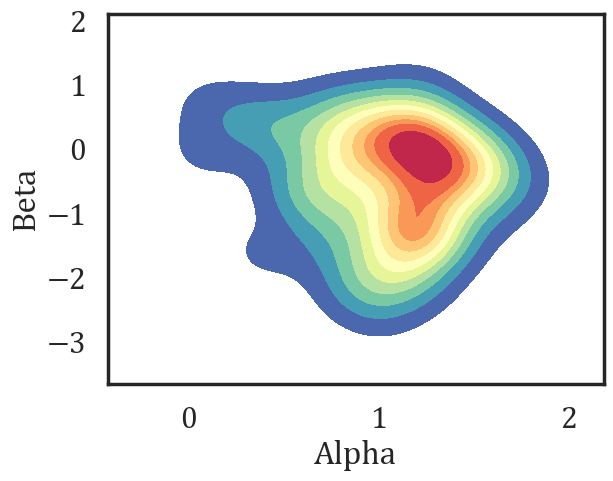

In [8]:
# Plot true addictive cue parameters - alcohol
norm_df = pd.DataFrame(modout[model_name]['fit']['norm_params'].T, columns=['Beta', 'Alpha', 'Mod'])
sns.kdeplot(data=norm_df, x='Alpha', y='Beta', fill=True, cmap='Spectral_r', levels=12)

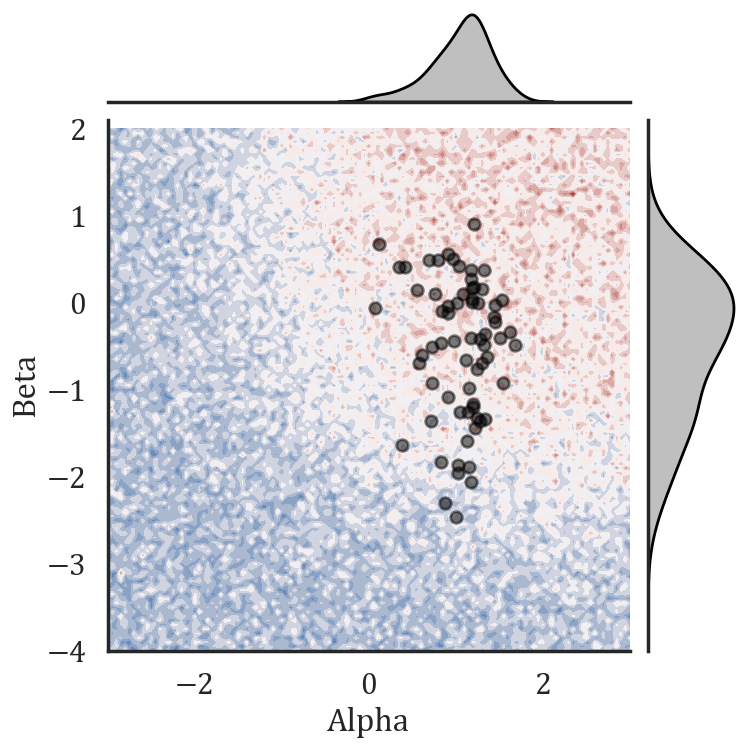

In [9]:
grid = sns.jointplot(x='Alpha', y='Beta', data=norm_df, kind='kde', fill=True, color='black', height=8)
grid.ax_joint.contourf(alpha_vals, beta_vals, rew_mesh.T, cmap='vlag', levels=12, extend='both')
grid.ax_joint.scatter(norm_df['Alpha'], norm_df['Beta'], color='black', alpha=0.5, s=70)

### Optimal money cue condition - Alcohol

In [10]:
model = 'o_add_rewbias_rw'
block = 'money'
mod = 0

sim_func = model_func_dict[model]
print(f'Simulating Model: {model}, Block: {block}')
model_name = f'{model}_{block}'
num_sims = 100
num_trials = 60
num_subjects = 12
sim_choices = np.zeros((num_sims, num_subjects, num_trials))
sim_rewards = np.zeros((num_sims, num_subjects, num_trials))

beta_vals = np.linspace(-4, 2, 121)
alpha_vals = np.linspace(-3, 3, 121)
rew_mesh = np.zeros((len(beta_vals), len(alpha_vals)))

for i, beta in enumerate(beta_vals):
    for j, alpha in enumerate(alpha_vals):
        # print(f'Alpha: {alpha}, Beta: {beta}')
        output = sim_func(
            np.array([[beta, alpha, mod],[beta, alpha, mod]]),
            block,
            modout[model_name]['behavior']['craving_ratings'][:2],
            ntrials=num_trials
        )
        # print(f'Alpha: {alpha}, Beta: {beta}, Reward: {output["rewards"].mean()}')
        rew_mesh[i, j] = output['rewards'].mean()
print(rew_mesh)

Simulating Model: o_add_rewbias_rw, Block: money
[[0.54166667 0.51666667 0.44166667 ... 0.475      0.44166667 0.55833333]
 [0.50833333 0.525      0.45       ... 0.53333333 0.50833333 0.55      ]
 [0.475      0.48333333 0.53333333 ... 0.49166667 0.51666667 0.475     ]
 ...
 [0.48333333 0.48333333 0.475      ... 0.625      0.66666667 0.61666667]
 [0.525      0.53333333 0.54166667 ... 0.65833333 0.64166667 0.61666667]
 [0.53333333 0.53333333 0.48333333 ... 0.61666667 0.55833333 0.575     ]]


<Axes: xlabel='Alpha', ylabel='Beta'>

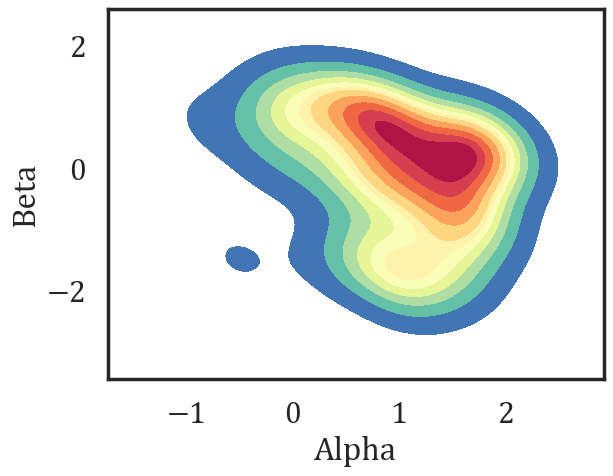

In [11]:
#Plot true money cue parameters - alcohol
norm_df = pd.DataFrame(modout[model_name]['fit']['norm_params'].T, columns=['Beta', 'Alpha', 'Mod'])
sns.kdeplot(data=norm_df, x='Alpha', y='Beta', fill=True, cmap='Spectral_r', levels=12)

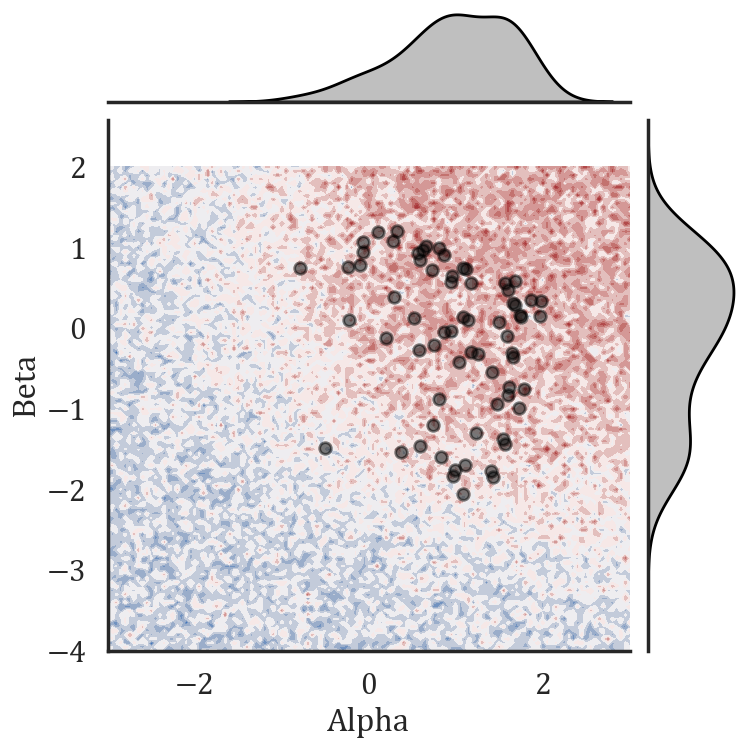

In [12]:
grid = sns.jointplot(x='Alpha', y='Beta', data=norm_df, kind='kde', fill=True, color='black', height=8)
grid.ax_joint.contourf(alpha_vals, beta_vals, rew_mesh.T, cmap='vlag', levels=12, extend='both')
grid.ax_joint.scatter(norm_df['Alpha'], norm_df['Beta'], color='black', alpha=0.5, s=70)

### Simulate choices and rewards

In [13]:
sim_dict = {}
sim_rew_dict = {}

for model in model_func_dict.keys():
    if not model in ['d_lrbias_rw', 'o_add_rewbias_rw']:
        continue
    sim_func = model_func_dict[model]
    for block in ['money', 'other']:
        print(f'Simulating Model: {model}, Block: {block}')
        model_name = f'{model}_{block}'
        num_sims = 50
        num_trials = 60
        num_subjects = modout[model_name]['fit']['params'].shape[0]
        sim_choices = np.zeros((num_sims, num_subjects, num_trials))
        sim_rewards = np.zeros((num_sims, num_subjects, num_trials))

        for i in tqdm(range(num_sims)):
            output = sim_func(
                modout[model_name]['fit']['norm_params'].T, 
                block,
                modout[model_name]['behavior']['craving_ratings'],
                ntrials=num_trials
            )
            sim_choices[i, :, :] = np.squeeze(output['choices'])
            sim_rewards[i, :, :] = np.squeeze(output['rewards'])
        sim_dict[model_name] = sim_choices
        sim_rew_dict[model_name] = sim_rewards

Simulating Model: d_lrbias_rw, Block: money


100%|██████████| 50/50 [00:04<00:00, 11.79it/s]


Simulating Model: d_lrbias_rw, Block: other


100%|██████████| 50/50 [00:04<00:00, 11.78it/s]


Simulating Model: o_add_rewbias_rw, Block: money


100%|██████████| 50/50 [00:04<00:00, 11.87it/s]


Simulating Model: o_add_rewbias_rw, Block: other


100%|██████████| 50/50 [00:04<00:00, 12.01it/s]


TtestResult(statistic=13.306965526694281, pvalue=1.762260227541359e-20, df=67)

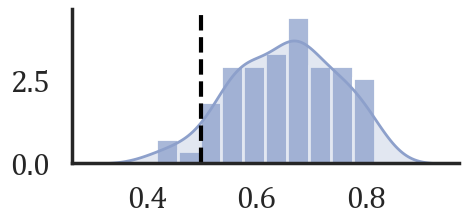

In [14]:
num_match = []
for sim, tru in zip(sim_dict['d_lrbias_rw_other'][0], np.squeeze(modout['d_lrbias_rw_other']['fit']['choices'])):
    # calculate matches between simulated and true choices
    num_match.append(np.sum(sim == tru)/len(tru))

num_random_match = []
for sim in sim_dict['d_lrbias_rw_other'][0]:
    # calculate matches between simulated and random choices
    num_random_match.append(np.sum(sim == np.random.choice([0, 1], size=len(tru))/len(tru))/len(tru))

fig, ax = plt.subplots(figsize=(5, 2))
sns.histplot(num_match, bins=10, ax=ax, stat='density', color=sns.palettes.color_palette('Set2')[2])
sns.kdeplot(num_match, ax=ax, fill=True, color=sns.palettes.color_palette('Set2')[2])
ax.axvline(0.5, color='black', linestyle='--')
stats.ttest_1samp(num_match, 0.5)
ax.set_ylabel('')
ax.set_xlabel('')
sns.despine()
stats.ttest_1samp(num_match, 0.5)


TtestResult(statistic=12.002691542156015, pvalue=2.3600436446077374e-18, df=67)

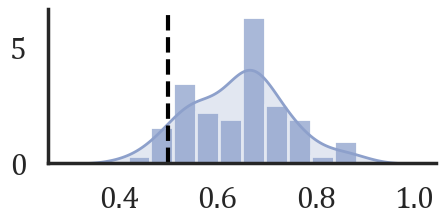

In [15]:
num_match = []
for sim, tru in zip(sim_dict['o_add_rewbias_rw_money'][0], np.squeeze(modout['o_add_rewbias_rw_money']['fit']['choices'])):
    # calculate matches between simulated and true choices
    num_match.append(np.sum(sim == tru)/len(tru))

num_random_match = []
for sim in sim_dict['o_add_rewbias_rw_money'][0]:
    # calculate matches between simulated and random choices
    num_random_match.append(np.sum(sim == np.random.choice([0, 1], size=len(tru))/len(tru))/len(tru))

fig, ax = plt.subplots(figsize=(5, 2))
sns.histplot(num_match, bins=10, ax=ax, stat='density', color=sns.palettes.color_palette('Set2')[2])
sns.kdeplot(num_match, ax=ax, fill=True, color=sns.palettes.color_palette('Set2')[2])
ax.axvline(0.5, color='black', linestyle='--')
ax.set_ylabel('')
ax.set_xlabel('')
sns.despine()
stats.ttest_1samp(num_match, 0.5)

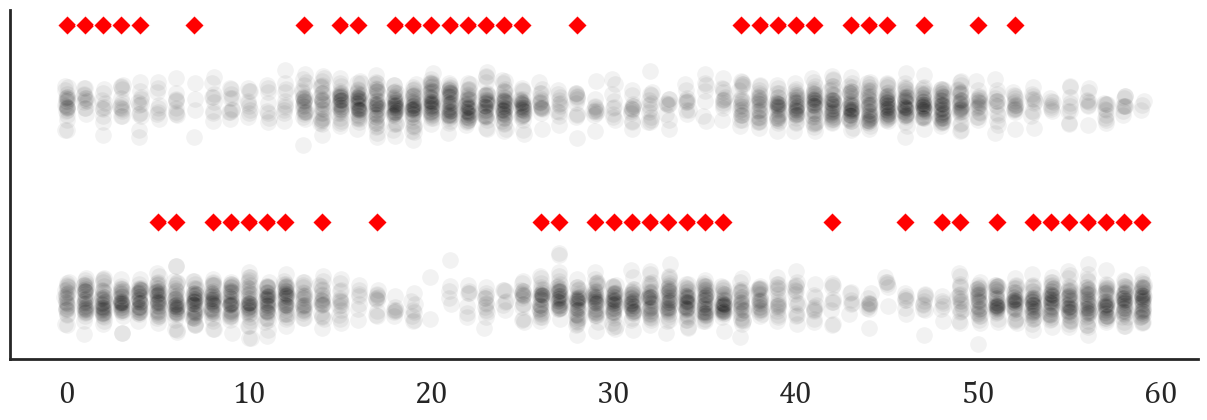

In [18]:
# mm = 1/25.4*3
fig, ax = plt.subplots(figsize=(80*mm, 30*mm))
sub_idx = 1
model_name = 'o_add_rewbias_rw_money'

for j in range(50):
    sns.scatterplot(x=np.arange(num_trials)+np.random.normal(0,0.05,num_trials), y=0.5*sim_dict[model_name][j, sub_idx, :]+np.random.normal(0, 0.03, num_trials), ax=ax, alpha=0.05, color='black')
sns.scatterplot(x=np.arange(num_trials), y=0.5*modout[model_name]['fit']['choices'][sub_idx, 0, :]+0.2, ax=ax, color='red', marker='D', s=100)
# ax.set_title("_".join(model_name.split('_')[:-1]))
# ax.set_yticks([0.125, 0.625])
ax.set_yticks([])
# ax.set_yticklabels(['Left', 'Right'])
# ax.set_xlabel('Trial Number')
# fig.suptitle('Model Simulations vs. True Choices\nMoney Cue', fontsize=18)
plt.setp(ax.spines.values(), linewidth=2)
sns.despine()
fig.tight_layout()

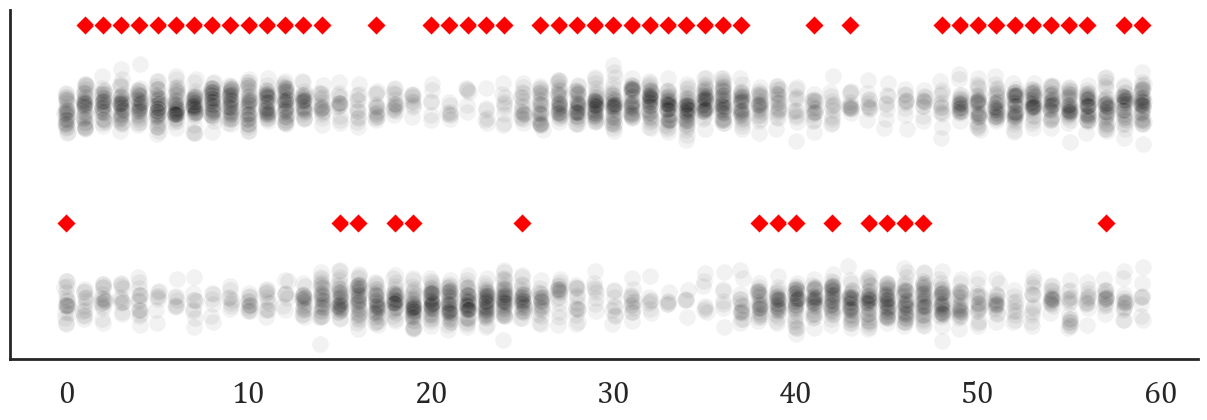

In [19]:
# mm = 1/25.4*3
fig, ax = plt.subplots(figsize=(80*mm, 30*mm))
sub_idx = 1
model_name = 'd_lrbias_rw_other'

for j in range(50):
    sns.scatterplot(x=np.arange(num_trials)+np.random.normal(0,0.05,num_trials), y=0.5*sim_dict[model_name][j, sub_idx, :]+np.random.normal(0, 0.03, num_trials), ax=ax, alpha=0.05, color='black')
sns.scatterplot(x=np.arange(num_trials), y=0.5*modout[model_name]['fit']['choices'][sub_idx, 0, :]+0.2, ax=ax, color='red', marker='D', s=100)
# ax.set_title("_".join(model_name.split('_')[:-1]))
# ax.set_yticks([0.125, 0.625])
ax.set_yticks([])
# ax.set_yticklabels(['Left', 'Right'])
# ax.set_xlabel('Trial Number')
# fig.suptitle('Model Simulations vs. True Choices\nMoney Cue', fontsize=18)
plt.setp(ax.spines.values(), linewidth=2)
sns.despine()
fig.tight_layout()

### Parameter recovery

In [20]:
paramrecovery_modout = {}

if os.path.exists(f'{decision_results_dir}/paramrecovery_alcohol_decision_models.pkl'):
    print('Loading existing decision models')
    with open(f'{decision_results_dir}/paramrecovery_alcohol_decision_models.pkl', 'rb') as f:
        paramrecovery_modout = pickle.load(f)
else:
    print('Not loaded')

Loading existing decision models


In [21]:
## Loop over blocks

for block in ['money', 'other']:
    
    # Loop through each model and fit it to the data
    for model_name, param_names, fit_func in [
        (f'c_nobias_asymmetric_rw_{block}', ['beta', 'lr_pos', 'lr_neg'], decision_models.c_nobias_asymmetric_rw.fit),
        (f'd_lrbias_rw_{block}', ['beta', 'lr', 'mod'], decision_models.d_lrbias_rw.fit),
        (f'e_betabias_rw_{block}', ['beta', 'lr', 'mod'], decision_models.e_betabias_rw.fit),
        (f'n_momentum_rw_{block}', ['beta', 'lr', 'mod', 'mom_lr'], decision_models.n_momentum_rw.fit),
        (f'o_add_rewbias_rw_{block}', ['beta', 'lr', 'mod'], decision_models.o_add_rewbias_rw.fit),
    ]:
        if model_name in paramrecovery_modout:
            print(f'{model_name} already fit')
            continue

        # create a dict of lists with choices and rewards for each subject
        subj_dict = {
            'choices': [],
            'rewards': [],
            'craving_ratings': []
        }

        # Loop through each subject and add their choices and rewards and craving ratings to the dict
        subj_dict['choices'] = [elem.reshape(1, 60) for elem in sim_dict[model_name][0]]
        subj_dict['rewards'] = [elem.reshape(1, 60) for elem in sim_rew_dict[model_name][0]]
        for pid in alcohol_longform.PID.unique():
            # subj_dict['choices'] += [np.array([alcohol_longform[
            #     (alcohol_longform.PID == pid)
            #     & (alcohol_longform.Type == block)
            # ]['Action'].values])]
            # subj_dict['rewards'] += [np.array([alcohol_longform[
            #     (alcohol_longform.PID == pid)
            #     & (alcohol_longform.Type == block)
            # ]['Reward'].values])]
            subj_dict['craving_ratings'] += [np.array([alcohol_longform[
                (alcohol_longform.PID == pid)
                & (alcohol_longform.Type == block)
            ]['Craving Rating'].values])]

        # Create the all_data list of lists required for pyEM
        all_data = []
        for idx, (choices, rewards, craving_ratings) in enumerate(zip(subj_dict['choices'], subj_dict['rewards'], subj_dict['craving_ratings'])):
            all_data += [[choices, rewards, craving_ratings]]

        print(f'Fitting {model_name} - {block.capitalize()} block')
        m, inv_h, posterior, NPL, NLPrior, NLL = EMfit(all_data, fit_func, param_names)
        paramrecovery_modout = store_modout(
            paramrecovery_modout, model_name, param_names, subj_dict, fit_func, 
            m, inv_h, posterior, NPL, NLPrior, NLL
        )


c_nobias_asymmetric_rw_money already fit
d_lrbias_rw_money already fit
e_betabias_rw_money already fit
n_momentum_rw_money already fit
o_add_rewbias_rw_money already fit
c_nobias_asymmetric_rw_other already fit
d_lrbias_rw_other already fit
e_betabias_rw_other already fit
n_momentum_rw_other already fit
o_add_rewbias_rw_other already fit


beta: r=0.863, p=0.000
lr: r=0.325, p=0.007
mod: r=0.498, p=0.000


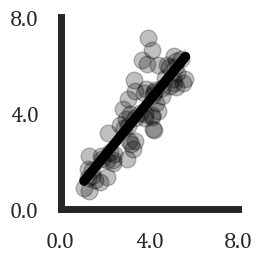

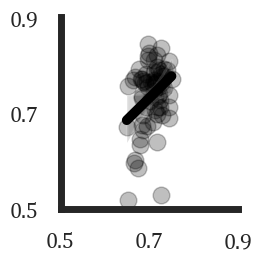

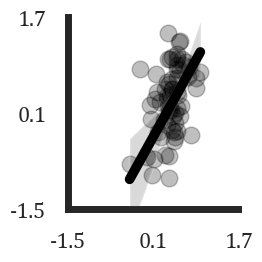

In [22]:
model_name = 'd_lrbias_rw_other'

param_ranges = {
    'beta': {'x_range': (0, 8), 'y_range': (0, 8)},
    'lr': {'x_range': (0.5, 0.9), 'y_range': (0.5, 0.9)},
    'mod': {'x_range': (-1.5, 1.7), 'y_range': (-1.5, 1.7)},
}

for i, (param_name, fit_param_est, refit_param_est) in enumerate(zip(
    paramrecovery_modout[model_name]['fit']['param_names'],
    paramrecovery_modout[model_name]['fit']['params'].T,
    modout[model_name]['fit']['params'].T
)):
    fig, ax = plt.subplots(figsize=(20*mm, 20*mm))
    sns.regplot(x=fit_param_est, y=refit_param_est, ax=ax, color='black', scatter_kws={'alpha': 0.25}, line_kws={'linewidth': 7})
    ax.set_xticks(np.linspace(*param_ranges[param_name]['x_range'], 3))
    ax.set_yticks(np.linspace(*param_ranges[param_name]['y_range'], 3))
    ax.set_xlim(*param_ranges[param_name]['x_range'])
    ax.set_ylim(*param_ranges[param_name]['y_range'])
    ax.set_xticklabels(np.round(np.linspace(*param_ranges[param_name]['x_range'], 3), 2), fontsize=16)
    ax.set_yticklabels(np.round(np.linspace(*param_ranges[param_name]['y_range'], 3), 2), fontsize=16)
    # ax[i].set_xlabel('Fit')
    # ax[i].set_ylabel('Refit')
    # ax[i].set_title(paramrecovery_modout[model_name]['fit']['param_names'][i])
    # Annotate with r and p-value
    r, p = stats.pearsonr(fit_param_est, refit_param_est)
    # ax[i].annotate(f'r={r:.2f}, p={p:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
    print(f'{paramrecovery_modout[model_name]["fit"]["param_names"][i]}: r={r:.3f}, p={p:.3f}')
    plt.setp(ax.spines.values(), linewidth=5)
    sns.despine()
    fig.tight_layout()
    # save fig as svg
    # plt.savefig(f'{figure_dir}/fig2_param_{param_name}_recovery_alcohol_other.svg', format='svg', dpi=300, transparent=True)
# for fit_param_name in paramrecovery_modout[model_name]['fit']['param_names']:

beta: r=0.906, p=0.000
lr: r=0.577, p=0.000
mod: r=0.340, p=0.005


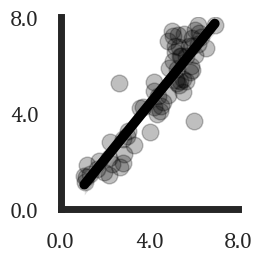

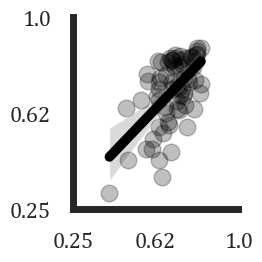

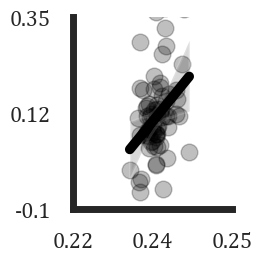

In [23]:
model_name = 'o_add_rewbias_rw_money'

param_ranges = {
    'beta': {'x_range': (0, 8), 'y_range': (0, 8)},
    'lr': {'x_range': (0.25, 1), 'y_range': (0.25, 1)},
    'mod': {'x_range': (0.22, 0.25), 'y_range': (-0.1, 0.35)},
}

for i, (param_name, fit_param_est, refit_param_est) in enumerate(zip(
    paramrecovery_modout[model_name]['fit']['param_names'],
    paramrecovery_modout[model_name]['fit']['params'].T,
    modout[model_name]['fit']['params'].T
)):
    fig, ax = plt.subplots(figsize=(20*mm, 20*mm))
    sns.regplot(x=fit_param_est, y=refit_param_est, ax=ax, color='black', scatter_kws={'alpha': 0.25}, line_kws={'linewidth': 7})
    ax.set_xticks(np.linspace(*param_ranges[param_name]['x_range'], 3))
    ax.set_yticks(np.linspace(*param_ranges[param_name]['y_range'], 3))
    ax.set_xlim(*param_ranges[param_name]['x_range'])
    ax.set_ylim(*param_ranges[param_name]['y_range'])
    ax.set_xticklabels(np.round(np.linspace(*param_ranges[param_name]['x_range'], 3), 2), fontsize=16)
    ax.set_yticklabels(np.round(np.linspace(*param_ranges[param_name]['y_range'], 3), 2), fontsize=16)
    # ax[i].set_xlabel('Fit')
    # ax[i].set_ylabel('Refit')
    # ax[i].set_title(paramrecovery_modout[model_name]['fit']['param_names'][i])
    # Annotate with r and p-value
    r, p = stats.pearsonr(fit_param_est, refit_param_est)
    # ax[i].annotate(f'r={r:.2f}, p={p:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
    print(f'{paramrecovery_modout[model_name]["fit"]["param_names"][i]}: r={r:.3f}, p={p:.3f}')
    plt.setp(ax.spines.values(), linewidth=5)
    sns.despine()
    fig.tight_layout()

## EMFit for all cannabis data

In [24]:
modout = {}

if os.path.exists(f'{decision_results_dir}/cannabis_decision_models.pkl'):
    print('Loading existing decision models')
    with open(f'{decision_results_dir}/cannabis_decision_models.pkl', 'rb') as f:
        modout = pickle.load(f)


Loading existing decision models


### Optimal LR and beta parameters - cannabis

In [25]:
model = 'd_lrbias_rw'
block = 'other'
mod = 0

sim_func = model_func_dict[model]
print(f'Simulating Model: {model}, Block: {block}')
model_name = f'{model}_{block}'
num_sims = 100
num_trials = 60
num_subjects = 12
sim_choices = np.zeros((num_sims, num_subjects, num_trials))
sim_rewards = np.zeros((num_sims, num_subjects, num_trials))

beta_vals = np.linspace(-4, 2, 121)
alpha_vals = np.linspace(-3, 3, 121)
rew_mesh = np.zeros((len(beta_vals), len(alpha_vals)))

for i, beta in enumerate(beta_vals):
    for j, alpha in enumerate(alpha_vals):
        # print(f'Alpha: {alpha}, Beta: {beta}')
        output = sim_func(
            np.array([[beta, alpha, mod],[beta, alpha, mod]]),
            block,
            modout[model_name]['behavior']['craving_ratings'][:2],
            ntrials=num_trials
        )
        # print(f'Alpha: {alpha}, Beta: {beta}, Reward: {output["rewards"].mean()}')
        rew_mesh[i, j] = output['rewards'].mean()
print(rew_mesh)

Simulating Model: d_lrbias_rw, Block: other
[[0.53333333 0.475      0.45       ... 0.475      0.6        0.50833333]
 [0.525      0.50833333 0.61666667 ... 0.51666667 0.55833333 0.525     ]
 [0.45833333 0.46666667 0.475      ... 0.63333333 0.53333333 0.55      ]
 ...
 [0.50833333 0.55       0.60833333 ... 0.70833333 0.575      0.64166667]
 [0.41666667 0.48333333 0.475      ... 0.64166667 0.7        0.70833333]
 [0.54166667 0.5        0.55       ... 0.7        0.625      0.73333333]]


<Axes: xlabel='Alpha', ylabel='Beta'>

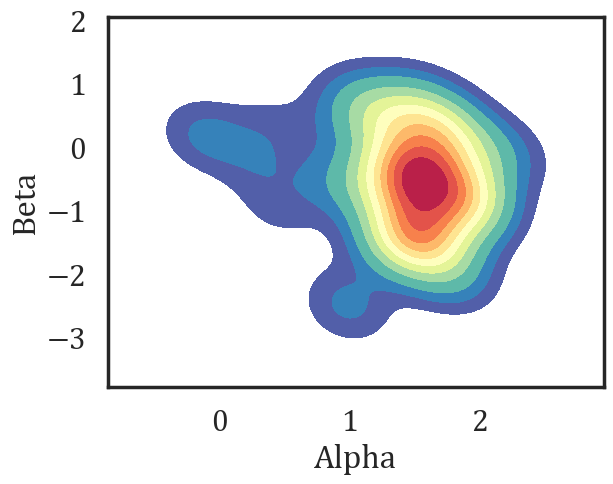

In [26]:
#Plot true addictive cue parameters - cannabis
norm_df = pd.DataFrame(modout[model_name]['fit']['norm_params'].T, columns=['Beta', 'Alpha', 'Mod'])
sns.kdeplot(data=norm_df, x='Alpha', y='Beta', fill=True, cmap='Spectral_r', levels=12)

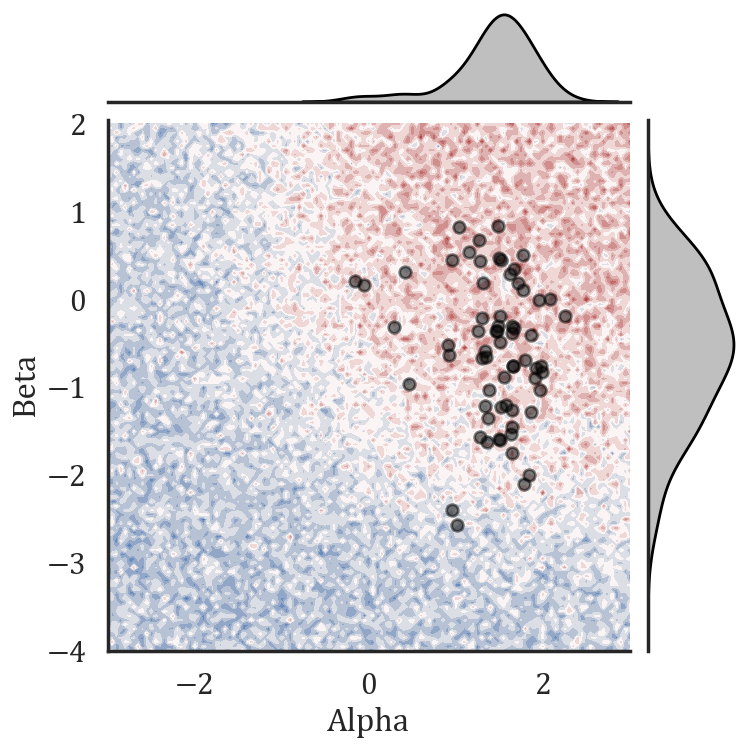

In [27]:
grid = sns.jointplot(x='Alpha', y='Beta', data=norm_df, kind='kde', fill=True, color='black', height=8)
grid.ax_joint.contourf(alpha_vals, beta_vals, rew_mesh.T, cmap='vlag', levels=12, extend='both')
grid.ax_joint.scatter(norm_df['Alpha'], norm_df['Beta'], color='black', alpha=0.5, s=70)

In [28]:
model = 'o_add_rewbias_rw'
block = 'money'
mod = 0

sim_func = model_func_dict[model]
print(f'Simulating Model: {model}, Block: {block}')
model_name = f'{model}_{block}'
num_sims = 100
num_trials = 60
num_subjects = 12
sim_choices = np.zeros((num_sims, num_subjects, num_trials))
sim_rewards = np.zeros((num_sims, num_subjects, num_trials))

beta_vals = np.linspace(-4, 2, 121)
alpha_vals = np.linspace(-3, 3, 121)
rew_mesh = np.zeros((len(beta_vals), len(alpha_vals)))

for i, beta in enumerate(beta_vals):
    for j, alpha in enumerate(alpha_vals):
        # print(f'Alpha: {alpha}, Beta: {beta}')
        output = sim_func(
            np.array([[beta, alpha, mod],[beta, alpha, mod]]),
            block,
            modout[model_name]['behavior']['craving_ratings'][:2],
            ntrials=num_trials
        )
        # print(f'Alpha: {alpha}, Beta: {beta}, Reward: {output["rewards"].mean()}')
        rew_mesh[i, j] = output['rewards'].mean()
print(rew_mesh)

Simulating Model: o_add_rewbias_rw, Block: money
[[0.46666667 0.55833333 0.45       ... 0.5        0.51666667 0.48333333]
 [0.525      0.48333333 0.54166667 ... 0.575      0.53333333 0.51666667]
 [0.575      0.5        0.41666667 ... 0.55833333 0.525      0.575     ]
 ...
 [0.53333333 0.5        0.5        ... 0.60833333 0.73333333 0.675     ]
 [0.54166667 0.51666667 0.44166667 ... 0.75833333 0.54166667 0.64166667]
 [0.425      0.55       0.44166667 ... 0.60833333 0.54166667 0.44166667]]


<Axes: xlabel='Alpha', ylabel='Beta'>

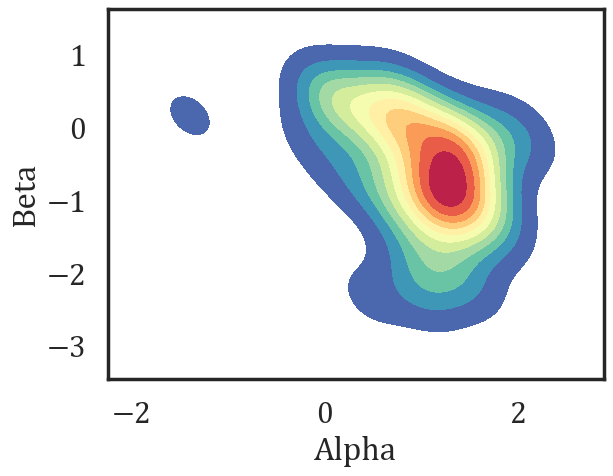

In [29]:
#Plot true money cue parameters - cannabis
norm_df = pd.DataFrame(modout[model_name]['fit']['norm_params'].T, columns=['Beta', 'Alpha', 'Mod'])
sns.kdeplot(data=norm_df, x='Alpha', y='Beta', fill=True, cmap='Spectral_r', levels=12)

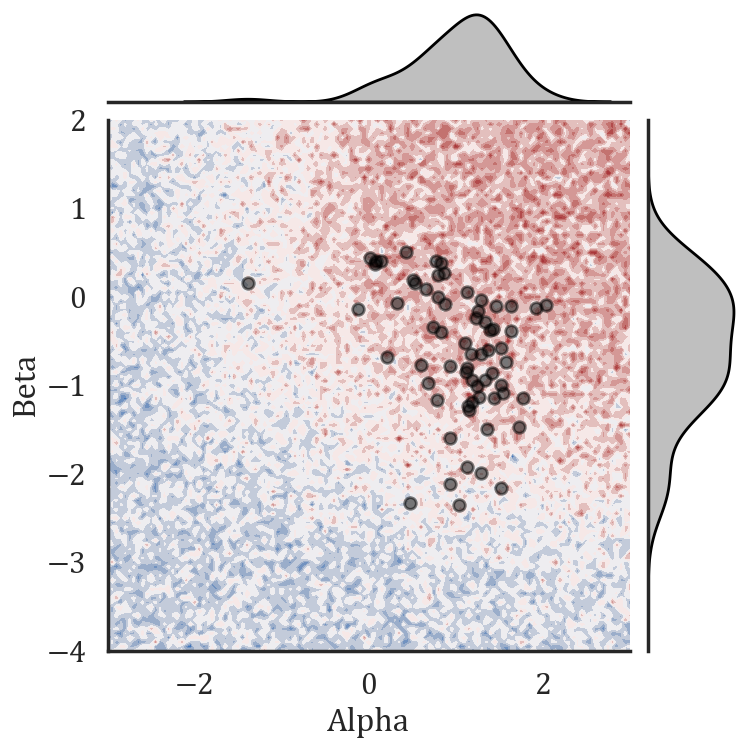

In [30]:
grid = sns.jointplot(x='Alpha', y='Beta', data=norm_df, kind='kde', fill=True, color='black', height=8)
grid.ax_joint.contourf(alpha_vals, beta_vals, rew_mesh.T, cmap='vlag', levels=12, extend='both')
grid.ax_joint.scatter(norm_df['Alpha'], norm_df['Beta'], color='black', alpha=0.5, s=70)

### Simulate choices and rewards - cannabis

In [31]:
sim_dict = {}
sim_rew_dict = {}

for model in model_func_dict.keys():
    if not model in ['d_lrbias_rw', 'o_add_rewbias_rw']:
        continue
    sim_func = model_func_dict[model]
    for block in ['money', 'other']:
        print(f'Simulating Model: {model}, Block: {block}')
        model_name = f'{model}_{block}'
        num_sims = 50
        num_trials = 60
        num_subjects = modout[model_name]['fit']['params'].shape[0]
        sim_choices = np.zeros((num_sims, num_subjects, num_trials))
        sim_rewards = np.zeros((num_sims, num_subjects, num_trials))

        for i in tqdm(range(num_sims)):
            output = sim_func(
                modout[model_name]['fit']['norm_params'].T, 
                block,
                modout[model_name]['behavior']['craving_ratings'],
                ntrials=num_trials
            )
            sim_choices[i, :, :] = np.squeeze(output['choices'])
            sim_rewards[i, :, :] = np.squeeze(output['rewards'])
        sim_dict[model_name] = sim_choices
        sim_rew_dict[model_name] = sim_rewards

Simulating Model: d_lrbias_rw, Block: money


100%|██████████| 50/50 [00:03<00:00, 12.82it/s]


Simulating Model: d_lrbias_rw, Block: other


100%|██████████| 50/50 [00:04<00:00, 12.24it/s]


Simulating Model: o_add_rewbias_rw, Block: money


100%|██████████| 50/50 [00:04<00:00, 12.27it/s]


Simulating Model: o_add_rewbias_rw, Block: other


100%|██████████| 50/50 [00:03<00:00, 12.97it/s]


TtestResult(statistic=9.107913166271144, pvalue=3.667170110952039e-13, df=64)

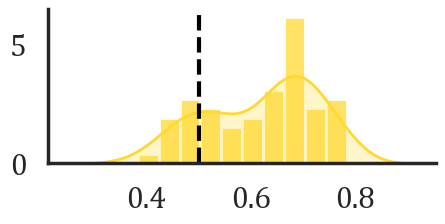

In [32]:
num_match = []
for sim, tru in zip(sim_dict['d_lrbias_rw_other'][0], np.squeeze(modout['d_lrbias_rw_other']['fit']['choices'])):
    # calculate matches between simulated and true choices
    num_match.append(np.sum(sim == tru)/len(tru))

num_random_match = []
for sim in sim_dict['d_lrbias_rw_other'][0]:
    # calculate matches between simulated and random choices
    num_random_match.append(np.sum(sim == np.random.choice([0, 1], size=len(tru))/len(tru))/len(tru))

fig, ax = plt.subplots(figsize=(5, 2))
sns.histplot(num_match, bins=10, ax=ax, stat='density', color=sns.palettes.color_palette('Set2')[5])
sns.kdeplot(num_match, ax=ax, fill=True, color=sns.palettes.color_palette('Set2')[5])
# sns.histplot(num_random_match, bins=8, color='gray')
# ax.axvline(np.mean(num_random_match), color='black', linestyle='--')
ax.axvline(0.5, color='black', linestyle='--')
ax.set_ylabel('')
ax.set_xlabel('')
sns.despine()
stats.ttest_1samp(num_match, 0.5)


TtestResult(statistic=9.254626153094849, pvalue=2.0371412721442561e-13, df=64)

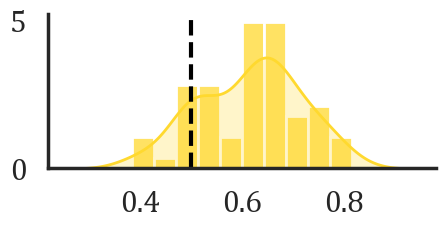

In [33]:
num_match = []
for sim, tru in zip(sim_dict['o_add_rewbias_rw_money'][0], np.squeeze(modout['o_add_rewbias_rw_money']['fit']['choices'])):
    # calculate matches between simulated and true choices
    num_match.append(np.sum(sim == tru)/len(tru))

num_random_match = []
for sim in sim_dict['o_add_rewbias_rw_money'][0]:
    # calculate matches between simulated and random choices
    num_random_match.append(np.sum(sim == np.random.choice([0, 1], size=len(tru))/len(tru))/len(tru))

fig, ax = plt.subplots(figsize=(5, 2))
sns.histplot(num_match, bins=10, ax=ax, stat='density', color=sns.palettes.color_palette('Set2')[5])
sns.kdeplot(num_match, ax=ax, fill=True, color=sns.palettes.color_palette('Set2')[5])
# sns.histplot(num_random_match, bins=8, color='gray')
# ax.axvline(np.mean(num_random_match), color='black', linestyle='--')
ax.axvline(0.5, color='black', linestyle='--')
ax.set_ylabel('')
ax.set_xlabel('')
sns.despine()
stats.ttest_1samp(num_match, 0.5)

### Parameter recovery

In [34]:
paramrecovery_modout = {}

if not os.path.exists(decision_results_dir):
    os.makedirs(decision_results_dir)
if os.path.exists(f'{decision_results_dir}/paramrecovery_cannabis_decision_models.pkl'):
    print('Loading existing decision models')
    with open(f'{decision_results_dir}/paramrecovery_cannabis_decision_models.pkl', 'rb') as f:
        paramrecovery_modout = pickle.load(f)
else:
    print('Not loaded')

Loading existing decision models


In [35]:
## Loop over blocks

for block in ['money', 'other']:
    
    # Loop through each model and fit it to the data
    for model_name, param_names, fit_func in [
        # (f'c_nobias_asymmetric_rw_{block}', ['beta', 'lr_pos', 'lr_neg'], decision_models.c_nobias_asymmetric_rw.fit),
        (f'd_lrbias_rw_{block}', ['beta', 'lr', 'mod'], decision_models.d_lrbias_rw.fit),
        # (f'e_betabias_rw_{block}', ['beta', 'lr', 'mod'], decision_models.e_betabias_rw.fit),
        # (f'n_momentum_rw_{block}', ['beta', 'lr', 'mod', 'mom_lr'], decision_models.n_momentum_rw.fit),
        (f'o_add_rewbias_rw_{block}', ['beta', 'lr', 'mod'], decision_models.o_add_rewbias_rw.fit),
    ]:
        if model_name in paramrecovery_modout:
            print(f'{model_name} already fit')
            continue

        # create a dict of lists with choices and rewards for each subject
        subj_dict = {
            'choices': [],
            'rewards': [],
            'craving_ratings': []
        }

        # Loop through each subject and add their choices and rewards and craving ratings to the dict
        subj_dict['choices'] = [elem.reshape(1, 60) for elem in sim_dict[model_name][0]]
        subj_dict['rewards'] = [elem.reshape(1, 60) for elem in sim_rew_dict[model_name][0]]
        for pid in cannabis_longform.PID.unique():
            # subj_dict['choices'] += [np.array([cannabis_longform[
            #     (cannabis_longform.PID == pid)
            #     & (cannabis_longform.Type == block)
            # ]['Action'].values])]
            # subj_dict['rewards'] += [np.array([cannabis_longform[
            #     (cannabis_longform.PID == pid)
            #     & (cannabis_longform.Type == block)
            # ]['Reward'].values])]
            subj_dict['craving_ratings'] += [np.array([cannabis_longform[
                (cannabis_longform.PID == pid)
                & (cannabis_longform.Type == block)
            ]['Craving Rating'].values])]

        # Create the all_data list of lists required for pyEM
        all_data = []
        for idx, (choices, rewards, craving_ratings) in enumerate(zip(subj_dict['choices'], subj_dict['rewards'], subj_dict['craving_ratings'])):
            all_data += [[choices, rewards, craving_ratings]]

        print(f'Fitting {model_name} - {block.capitalize()} block')
        m, inv_h, posterior, NPL, NLPrior, NLL = EMfit(all_data, fit_func, param_names)
        paramrecovery_modout = store_modout(
            paramrecovery_modout, model_name, param_names, subj_dict, fit_func, 
            m, inv_h, posterior, NPL, NLPrior, NLL
        )


d_lrbias_rw_money already fit
o_add_rewbias_rw_money already fit
d_lrbias_rw_other already fit
o_add_rewbias_rw_other already fit


beta: r=0.794, p=0.000
lr: r=0.585, p=0.000
mod: r=0.683, p=0.000


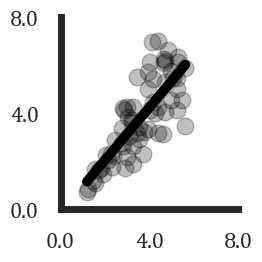

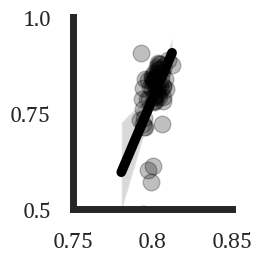

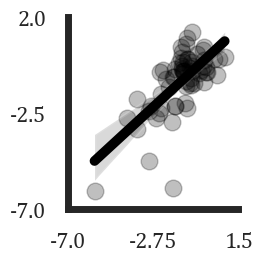

In [36]:
model_name = 'd_lrbias_rw_other'

param_ranges = {
    'beta': {'x_range': (0, 8), 'y_range': (0, 8)},
    'lr': {'x_range': (0.75, 0.85), 'y_range': (0.5, 1)},
    'mod': {'x_range': (-7, 1.5), 'y_range': (-7, 2)},
}

for i, (param_name, fit_param_est, refit_param_est) in enumerate(zip(
    paramrecovery_modout[model_name]['fit']['param_names'],
    paramrecovery_modout[model_name]['fit']['params'].T,
    modout[model_name]['fit']['params'].T
)):
    fig, ax = plt.subplots(figsize=(20*mm, 20*mm))
    sns.regplot(x=fit_param_est, y=refit_param_est, ax=ax, color='black', scatter_kws={'alpha': 0.25}, line_kws={'linewidth': 7})
    ax.set_xticks(np.linspace(*param_ranges[param_name]['x_range'], 3))
    ax.set_yticks(np.linspace(*param_ranges[param_name]['y_range'], 3))
    ax.set_xlim(*param_ranges[param_name]['x_range'])
    ax.set_ylim(*param_ranges[param_name]['y_range'])
    ax.set_xticklabels(np.round(np.linspace(*param_ranges[param_name]['x_range'], 3), 2), fontsize=16)
    ax.set_yticklabels(np.round(np.linspace(*param_ranges[param_name]['y_range'], 3), 2), fontsize=16)
    # ax[i].set_xlabel('Fit')
    # ax[i].set_ylabel('Refit')
    # ax[i].set_title(paramrecovery_modout[model_name]['fit']['param_names'][i])
    # Annotate with r and p-value
    r, p = stats.pearsonr(fit_param_est, refit_param_est)
    # ax[i].annotate(f'r={r:.2f}, p={p:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
    print(f'{paramrecovery_modout[model_name]["fit"]["param_names"][i]}: r={r:.3f}, p={p:.3f}')
    plt.setp(ax.spines.values(), linewidth=5)
    sns.despine()
    fig.tight_layout()

beta: r=0.794, p=0.000
lr: r=0.481, p=0.000
mod: r=0.405, p=0.001


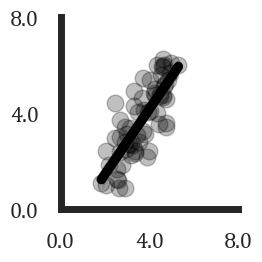

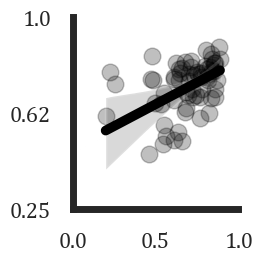

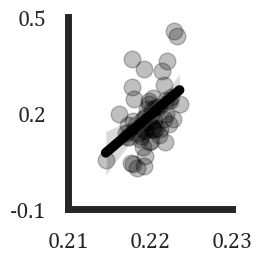

In [37]:
model_name = 'o_add_rewbias_rw_money'

param_ranges = {
    'beta': {'x_range': (0, 8), 'y_range': (0, 8)},
    'lr': {'x_range': (0, 1), 'y_range': (0.25, 1)},
    'mod': {'x_range': (0.21, 0.23), 'y_range': (-0.1, 0.5)},
}

for i, (param_name, fit_param_est, refit_param_est) in enumerate(zip(
    paramrecovery_modout[model_name]['fit']['param_names'],
    paramrecovery_modout[model_name]['fit']['params'].T,
    modout[model_name]['fit']['params'].T
)):
    fig, ax = plt.subplots(figsize=(20*mm, 20*mm))
    sns.regplot(x=fit_param_est, y=refit_param_est, ax=ax, color='black', scatter_kws={'alpha': 0.25}, line_kws={'linewidth': 7})
    ax.set_xticks(np.linspace(*param_ranges[param_name]['x_range'], 3))
    ax.set_yticks(np.linspace(*param_ranges[param_name]['y_range'], 3))
    ax.set_xlim(*param_ranges[param_name]['x_range'])
    ax.set_ylim(*param_ranges[param_name]['y_range'])
    ax.set_xticklabels(np.round(np.linspace(*param_ranges[param_name]['x_range'], 3), 2), fontsize=16)
    ax.set_yticklabels(np.round(np.linspace(*param_ranges[param_name]['y_range'], 3), 2), fontsize=16)
    # ax[i].set_xlabel('Fit')
    # ax[i].set_ylabel('Refit')
    # ax[i].set_title(paramrecovery_modout[model_name]['fit']['param_names'][i])
    # Annotate with r and p-value
    r, p = stats.pearsonr(fit_param_est, refit_param_est)
    # ax[i].annotate(f'r={r:.2f}, p={p:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
    print(f'{paramrecovery_modout[model_name]["fit"]["param_names"][i]}: r={r:.3f}, p={p:.3f}')
    plt.setp(ax.spines.values(), linewidth=5)
    sns.despine()
    fig.tight_layout()